<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Inference and Prediction
              
</p>
</div>

Data Science Cohort Live NYC Aug 2024
<p>Phase 3: Topic 19</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

**Inference**

- Hypothesis testing based on limited information.

**In the context of t-testing on means**:

The **sample mean** of the Gabonese elephants vs. the mean of the savannah population.

Is there a significant difference between the Gabonese and general Savannah population?

<center><img src = "Images/elephants.jpg" align = center width = 400></center>
<center>Forest vs. Savannah elephants</center>

**In the context of chi-squared testing**:

Character classes preferences for MMORPG players:
- UK **sample count distribution**.
- Expected from US population.

Is there a significant difference in class preferences between UK and US users?

<center><img src = "Images/mmorpg.png" align = "center" width = 800 /></center>
<center>Bombergirl looks like some fun.</center>

**In the context of linear regression**:



- Does the total population in a country have any correlation with its average life expectancy?
- Which factors can be said to have **statistically significant** effects on explaining the variance in life expectancy?
- What is the weight of each factor? What is our uncertainty in this weight?

<center><img src = "Images/jaffer.png" width = 400></center>
<center>You are keeping him waiting for answers...</center>

- Get data.
- Make inference from a statistic/estimator based off the data (sample):
    - sample mean $\bar{X}$
    - sample median
    - $\hat{\beta}_1$, $\hat{\beta}_0$ from linear regression on dataset.

In [26]:
import pandas as pd
import numpy as np
#load WHO dataset: all countries health data 2001-2015
WHO_df = pd.read_csv('Data/WHO_life.csv').dropna()

# stripping white space on column names
WHO_df.columns = WHO_df.columns.str.strip()

In [27]:
WHO_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio                    

In [28]:
feature_cols = ['HIV/AIDS', 'BMI', 'Population', 'Polio', 'Population', 'Alcohol', 'GDP']
X = WHO_df[feature_cols]
# standardize features
X_standard = X.apply(lambda x: (x - x.mean())/x.std() )
y = WHO_df['Life expectancy']
y_standard = (y - y.mean())/y.std()

Which of these factors affect life expectancy? Their relative weights?

- Confidence intervals of weights
- Key here is *understanding* of relationships between dependent and independent variables.
- Minimal model explaining variance.

We did this kind of statistical inference with statsmodels.

In [29]:
import statsmodels.api as sm
X_aug = sm.add_constant(X_standard)
res = sm.OLS(y_standard, X_aug).fit()

In [30]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     522.0
Date:                Fri, 04 Oct 2024   Prob (F-statistic):               0.00
Time:                        08:57:56   Log-Likelihood:                -1459.3
No. Observations:                1649   AIC:                             2933.
Df Residuals:                    1642   BIC:                             2971.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.303e-16      0.014   5.05e-14      1.000      -0.028       0.028
HIV/AIDS      -0.4849      0.015    -32.453      0.000      -0.514      -0.456
BMI            0.3010      0.016     18.751      0.000       0.270       0.332
Population     0.0021      0.007      0.294      0.769      -0.012       0.016
Polio          0.1486      0.015      9.858      0.000       0.119       0.178
Population     0.0021      0.007      0.294      0.769      -0.012       0.016
Alcohol        0.1506      0.017      8.820      0.000       0.117       0.184
GDP            0.2188      0.016     13.382      0.000       0.187       0.251
==============================================================================
Omnibus:                       19.852   Durbin-Watson:                   0.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.909
Skew:                          -0.145   Prob(JB):                     1.43e-06
Kurtosis:                       3.555   Cond. No.                     2.00e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.52e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Prediction

Emphasis is different:
- Want to build a little machine:

<center><img src = "Images/machine-learning-prediction.png" /></center>

E.g.,

- Input: Features reflecting socioeconomic factors of Zamunda  
    
- Output: Life expectancy of Zamunda

<center><img src = "Images/machine-learning-prediction.png" /></center>

- Getting good estimates of feature weights, their confidence intervals matter less here.
- Less emphasis on building minimal explanatory model.
- As long as it improves performance of machine, add more predictors


**Prediction Mode**
1. Use data (sample) to train model.
2. How well, on the average, does model **simulate** process (population) that generated sample? Evaluate/test model.
3. Use model to make prediction on new data.

Statsmodels good for statistical inference.
- Scikit-learn good for training/testing/prediction.
- Designed as general machine-learning framework

<img src = "Images/sklearn.png" width = 600/>

Let's use linear regression in scikit-learn.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Define the linear regression model

In [32]:
lr = LinearRegression()
lr

LinearRegression()

Training a model
- Training: model optimizes parameters to best fit the training data.
- In this case: fit regression coefficients minimizing least squared error.
- Essentially creates your prediction machine.

Testing a model
- Take data model has never seen.
- How well does modeling predict (generalize) on data it hasn't optimized to?

Need to do both.
- In practice: split dataset into train and test sets.
- Training set: optimize model on.
- Test set: evaluate model performance.

Scikit-learn:

Has function to do this.

train_test_split(X, y, test_size = ...)
- Shuffles data
- Leaves some fraction for testing and the rest for training.

In [33]:
# For this, I haven't standardized. Want the actual life expectancy.
# Take all the relevant columns 
col_selector = ['HIV/AIDS', 'Hepatitis B', 'BMI', 'Population', 'Polio',
                'Alcohol', 'GDP', 'Measles','Total expenditure', 'Schooling', 'thinness  1-19 years']
X = WHO_df[col_selector]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
print(len(X_train))
print(len(X_test))

1154
495


#### Creating our prediction machine
- Train the model
- .fit(X,y) method trains the model

In [35]:
lr.fit(X_train, y_train)

LinearRegression()

Get the "learned" weights:
- Minimizing least squares objective function on training data.
- i.e. fit coefficients using training data.

In [36]:
lr.coef_

array([-6.13888972e-01,  5.28310060e-03,  5.96053622e-02,  1.81555449e-09,
        2.68672787e-02, -1.34016271e-01,  9.71594751e-05,  2.08956285e-05,
        8.92068315e-03,  1.54012743e+00, -1.08449355e-01])

In [37]:
lr.intercept_

47.332371321436725

In [38]:
X_train.columns

Index(['HIV/AIDS', 'Hepatitis B', 'BMI', 'Population', 'Polio', 'Alcohol',
       'GDP', 'Measles', 'Total expenditure', 'Schooling',
       'thinness  1-19 years'],
      dtype='object')

Now, can also get $R^2$ on fit.

In [39]:
lr.score(X_train, y_train)

0.7511810468245353

Evaluating our model on the test data:
- Get predictions of model.
- Compare predictions of model to actual y (life expectancy).

.predict(X_test) method on trained model

In [40]:
# This gets the predictions of model on test set.
y_pred = lr.predict(X_test)
#get first ten elements of prediction.
y_pred[0:10]

array([66.01338338, 77.98380112, 82.10188853, 71.51720997, 69.1581925 ,
       50.64513683, 77.96390052, 77.79464056, 72.98447987, 69.40468904])

Evaluating the model:
- We care about how good prediction on life expectancy is given X (features).
- Compare $y_{pred}$ made on $X_{test}$ to actual $y_{test}$.
- Some metrics for comparison: the mean absolute error, the root mean squared error.

Mean absolute error:
$$ MAE = \frac{1}{N}\sum_i^N |y_{i}- \hat{y}_i|$$

where $\hat{y}_i$ is our prediction.

Root means squared error:
- More sensitive to outliers.

$$ RMSE = \sqrt{\frac{1}{N}\sum_i^N (y_{i}- \hat{y}_i)^2} $$

Evaluate model prediction on test set:

In [41]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

3.396756966930167

In [42]:
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
RMSE

4.167793825387659

In [43]:
import matplotlib.pyplot as plt

In [44]:
%%capture life_test
fig, ax = plt.subplots()
y_test.hist(bins = 15, ax = ax)
ax.set_xlabel('Life expectancy')
ax.set_ylabel('Counts')
ax.set_title('Life expectancy: test distribution')
plt.show()

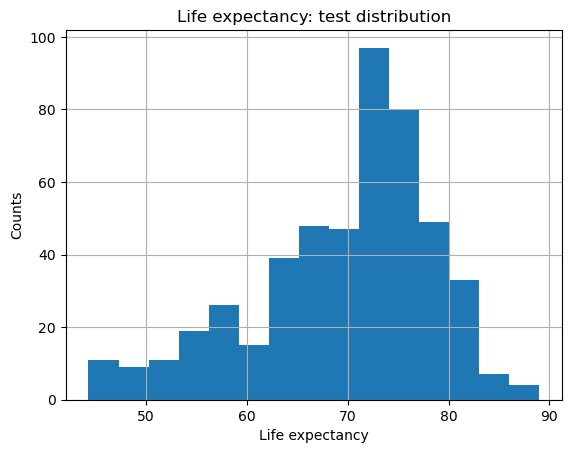

In [45]:
life_test()

From the perspective of prediction and our tolerance: this is not shabby.
- Seeing a few individual examples.

In [46]:
examp_idx = 18
single_examp = X_test.iloc[examp_idx].values
X_test.iloc[examp_idx]

HIV/AIDS                3.000000e-01
Hepatitis B             6.000000e+00
BMI                     1.300000e+01
Population              1.126136e+09
Polio                   5.800000e+01
Alcohol                 1.200000e+00
GDP                     6.213184e+02
Measles                 5.544300e+04
Total expenditure       4.220000e+00
Schooling               9.200000e+00
thinness  1-19 years    2.720000e+01
Name: 1197, dtype: float64

In [47]:
single_examp

array([3.00000000e-01, 6.00000000e+00, 1.30000000e+01, 1.12613578e+09,
       5.80000000e+01, 1.20000000e+00, 6.21318377e+02, 5.54430000e+04,
       4.22000000e+00, 9.20000000e+00, 2.72000000e+01])

In [48]:
single_examp.reshape(1,-1)

array([[3.00000000e-01, 6.00000000e+00, 1.30000000e+01, 1.12613578e+09,
        5.80000000e+01, 1.20000000e+00, 6.21318377e+02, 5.54430000e+04,
        4.22000000e+00, 9.20000000e+00, 2.72000000e+01]])

In [49]:
lr.predict(single_examp.reshape(1,-1))

C:\Users\Praveen\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([63.87269491])

In [50]:
y_test.iloc[examp_idx]

64.0

#### Determinants of prediction error
- Will talk about this in detail in a future lecture.

Much of machine learning focuses on understanding sources of error.
- Tuning model to get better prediction performance in test phase.
- Balancing tradeoffs between various sources of error.


The king wants you to:
- estimate the average life expectancy of his subjects. 
- speculate on what factors might be at play in determining the average life of his subject. 



#### Answering the king's first question:

In [62]:
zamunda_dict = {'HIV/AIDS': 14.4, 'Hepatitis B': 93, 'BMI': 33.2, 'Population': 1884238, 'Polio': 96, 'Alcohol': 6.45,
       'GDP': 5374, 'Measles': 6, 'Total expenditure': 4.93, 'Schooling': 11.9, 'thinness  1-19 years': 9.6}

X_zamunda = pd.Series(zamunda_dict)
X_zamunda

HIV/AIDS                     14.40
Hepatitis B                  93.00
BMI                          33.20
Population              1884238.00
Polio                        96.00
Alcohol                       6.45
GDP                        5374.00
Measles                       6.00
Total expenditure             4.93
Schooling                    11.90
thinness  1-19 years          9.60
dtype: float64

Let's put this into the model and get our prediction. For a single example need to:
- convert to numpy array
- do a reshape to get into form scikit learn likes.

In [74]:
X_zam_np = X_zamunda.copy()
X_zam_np.values

array([1.440000e+01, 9.300000e+01, 3.320000e+01, 1.884238e+06,
       9.600000e+01, 6.450000e+00, 5.374000e+03, 6.000000e+00,
       4.930000e+00, 1.190000e+01, 9.600000e+00])

In [76]:
# predict() needs to take a 2D array
X_zam_np.values.reshape(1,-1)

array([[1.440000e+01, 9.300000e+01, 3.320000e+01, 1.884238e+06,
        9.600000e+01, 6.450000e+00, 5.374000e+03, 6.000000e+00,
        4.930000e+00, 1.190000e+01, 9.600000e+00]])

The model predicts a life expectancy for Zamunda of:

In [77]:
lr.predict(X_zam_np.values.reshape(1,-1))

C:\Users\Praveen\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([60.53351321])

Is this good? Is this bad? Compare to:

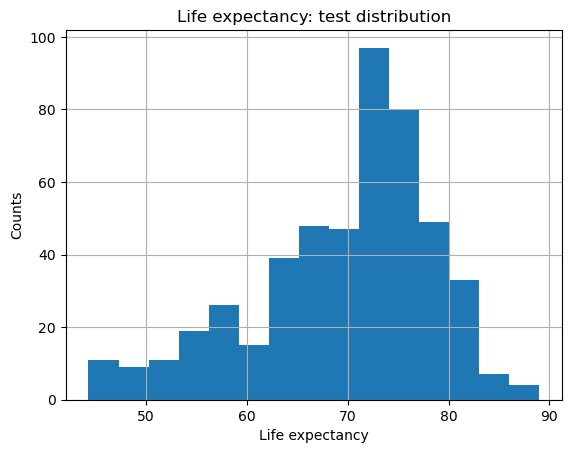

In [55]:
life_test()

**Prediction**
- What is the average life expectancy of his subjects?
    - ~60 years.


**Inference**
- HIV/AIDS prevalence and Schooling
- High correlation with life expectancy

#### Next up

- Improving model performance by:
    - transforming features
    - systematically understanding/correcting for sources of prediction error.
